# Constant Bidding

In [1]:
import pandas as pd

train = pd.read_csv('/Users/liuce/Downloads/we_data/train.csv')
validation = pd.read_csv('/Users/liuce/Downloads/we_data/validation.csv')
#test = pd.read_csv('/Users/liuce/Downloads/we_data/test.csv')

In [2]:
train.describe()

,click,weekday,hour,region,city,slotwidth,slotheight,slotprice,bidprice,payprice,advertiser
count,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06
mean,7.375623e-04,2.888556e+00,1.348925e+01,1.493833e+02,1.543295e+02,5.774218e+02,1.885723e+02,2.671783e+01,2.729620e+02,7.815142e+01,2.840736e+03
std,2.714809e-02,2.055223e+00,6.567105e+00,1.020631e+02,1.033093e+02,3.216738e+02,1.314946e+02,3.704444e+01,2.891153e+01,5.984636e+01,7.841990e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+02,5.000000e+01,0.000000e+00,2.270000e+02,0.000000e+00,1.458000e+03
25%,0.000000e+00,1.000000e+00,1.000000e+01,7.900000e+01,7.900000e+01,3.000000e+02,9.000000e+01,0.000000e+00,2.410000e+02,3.300000e+01,2.259000e+03
50%,0.000000e+00,3.000000e+00,1.400000e+01,1.460000e+02,1.520000e+02,3.360000e+02,9.000000e+01,5.000000e+00,2.940000e+02,6.800000e+01,3.358000e+03
75%,0.000000e+00,5.000000e+00,1.900000e+01,2.160000e+02,2.220000e+02,9.600000e+02,2.500000e+02,5.000000e+01,3.000000e+02,9.900000e+01,3.427000e+03
max,1.000000e+00,6.000000e+00,2.300000e+01,3.950000e+02,3.990000e+02,1.000000e+03,6.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.476000e+03


In [2]:
train[:5]

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,null
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1,...,250,FourthView,Na,0,10722,294,23,null,2821,null
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2,...,90,OtherView,Na,133,7330,277,133,null,2259,null


In [53]:
advertisers = set(train['advertiser']) # the list of advertisers.
advertisers

{1458, 2259, 2261, 2821, 2997, 3358, 3386, 3427, 3476}

In [8]:
train['bidprice'].describe()

count    2.430981e+06
mean     2.729620e+02
std      2.891153e+01
min      2.270000e+02
25%      2.410000e+02
50%      2.940000e+02
75%      3.000000e+02
max      3.000000e+02
Name: bidprice, dtype: float64

In [3]:
import sys

# show how far a loop goes
def progress(count, total, status='Complete'):
    bar_len = 60
    filled_len = int(round(bar_len * count / total))
    percents = round(100.0 * count / total, 1)
    bar = '=' * filled_len + '-' * (bar_len - filled_len)
    sys.stdout.write('[%s] %s%s %s\r' % (bar, percents, '%', status))
    if count==total:
        sys.stdout.write('\n')
    sys.stdout.flush()

# 算法 (Evaluation)

In [17]:
# pBidprice : is a constant value
# payprice  : is a list of market prices
# clicks    : is the list of user feedback on clicks

def const_evaluation (pBidprice, payprice, clicks, budget=6250000):
    win_num = 0.
    total_cost = 0.
    click_num = 0.
    
    N = len(payprice)
    for i in range(0, N):
        #progress(i, N, )
        if pBidprice > payprice[i]:
            if total_cost + payprice[i] > budget:
                break
            else:
                win_num = win_num + 1
                total_cost = total_cost + payprice[i]
                click_num += clicks[i]
                
    if win_num == 0:
        ctr = 0
    else:
        ctr = click_num / win_num
        
    if click_num == 0:
        cpc = -1
    else:
        cpc = total_cost / click_num
        
    print('bidprice {}, win_num {}, total_cost {}, click_num {}, ctr {}, cpc {}'.format(pBidprice, win_num, total_cost, click_num, ctr, cpc))
    return win_num, total_cost, click_num, ctr, cpc


# “训练”

In [6]:
import time

In [5]:
payprice_train = train['payprice']
clicks_train = train['click']

In [18]:
bidPrice_sample = 200

start = time.clock()

impression, total_cost, click_num, ctr, cpc = const_evaluation(bidPrice_sample, payprice_train, clicks_train)

end = time.clock()
elapsed = (time.clock() - start)
elapsed

# 100 price, 14.816s
# 200 price,  9.771s

bidprice 200, win_num 92258.0, total_cost 6249993.0, click_num 58.0, ctr 0.0006286717683019359, cpc 107758.5


9.779894000000013

In [19]:
bidPrice_sample = 10

start = time.clock()

impression, total_cost, click_num, ctr, cpc = const_evaluation(bidPrice_sample, payprice_train, clicks_train)

end = time.clock()
elapsed = (time.clock() - start)
elapsed

bidprice 10, win_num 109676.0, total_cost 625181.0, click_num 34.0, ctr 0.00031000401181662353, cpc 18387.676470588234


75.58734700000002

In [21]:
bidLimit_lower = 10
bidLimit_higher = 300

n = len(range(bidLimit_lower, bidLimit_higher, 1))
i = 0 # index for the bidding price

logs = []

for bidPrice in range(bidLimit_lower, bidLimit_higher, 1):
    
    i += 1
    progress(i, n, ) # 显示进度
    
    imp, total_cost, click_num, ctr, cpc = const_evaluation(bidPrice, payprice_train, clicks_train)
    logs.append((imp, total_cost, click_num, ctr, cpc))

bidprice 10, win_num 109676.0, total_cost 625181.0, click_num 34.0, ctr 0.00031000401181662353, cpc 18387.676470588234
bidprice 11, win_num 130911.0, total_cost 837531.0, click_num 40.0, ctr 0.0003055510996020197, cpc 20938.275
bidprice 12, win_num 147845.0, total_cost 1023805.0, click_num 47.0, ctr 0.00031790050390611787, cpc 21783.08510638298
bidprice 13, win_num 161746.0, total_cost 1190617.0, click_num 51.0, ctr 0.0003153091884807043, cpc 23345.43137254902
bidprice 14, win_num 174148.0, total_cost 1351843.0, click_num 57.0, ctr 0.0003273078071525369, cpc 23716.543859649122
bidprice 15, win_num 186641.0, total_cost 1526745.0, click_num 59.0, ctr 0.00031611489436940437, cpc 25877.033898305086
bidprice 16, win_num 198827.0, total_cost 1709535.0, click_num 66.0, ctr 0.0003319468683830667, cpc 25902.045454545456
bidprice 17, win_num 216462.0, total_cost 1991695.0, click_num 70.0, ctr 0.0003233823950624128, cpc 28452.785714285714
bidprice 18, win_num 235737.0, total_cost 2319370.0, click

bidprice 148, win_num 107716.0, total_cost 6249978.0, click_num 72.0, ctr 0.0006684243752088827, cpc 86805.25
bidprice 149, win_num 106560.0, total_cost 6249931.0, click_num 72.0, ctr 0.0006756756756756757, cpc 86804.59722222222
bidprice 150, win_num 106141.0, total_cost 6249960.0, click_num 72.0, ctr 0.000678342958894301, cpc 86805.0
bidprice 151, win_num 105577.0, total_cost 6249964.0, click_num 71.0, ctr 0.0006724949562878278, cpc 88027.66197183098
bidprice 152, win_num 105018.0, total_cost 6249972.0, click_num 72.0, ctr 0.0006855967548420271, cpc 86805.16666666667
bidprice 153, win_num 104809.0, total_cost 6249909.0, click_num 72.0, ctr 0.000686963905771451, cpc 86804.29166666667
bidprice 154, win_num 104581.0, total_cost 6249993.0, click_num 72.0, ctr 0.000688461575238332, cpc 86805.45833333333
bidprice 155, win_num 104368.0, total_cost 6249935.0, click_num 72.0, ctr 0.0006898666257856814, cpc 86804.65277777778
bidprice 156, win_num 104167.0, total_cost 6249980.0, click_num 72.0, 

bidprice 218, win_num 87432.0, total_cost 6249987.0, click_num 57.0, ctr 0.0006519352182267362, cpc 109648.8947368421
bidprice 219, win_num 87332.0, total_cost 6249930.0, click_num 57.0, ctr 0.0006526817203316081, cpc 109647.8947368421
bidprice 220, win_num 87215.0, total_cost 6249996.0, click_num 57.0, ctr 0.0006535573009230064, cpc 109649.05263157895
bidprice 221, win_num 87001.0, total_cost 6249938.0, click_num 57.0, ctr 0.0006551648831622625, cpc 109648.0350877193
bidprice 222, win_num 86723.0, total_cost 6249988.0, click_num 57.0, ctr 0.0006572650853868062, cpc 109648.91228070176
bidprice 223, win_num 86575.0, total_cost 6249987.0, click_num 57.0, ctr 0.0006583886803349697, cpc 109648.8947368421
bidprice 224, win_num 86473.0, total_cost 6249869.0, click_num 57.0, ctr 0.000659165288587189, cpc 109646.82456140351
bidprice 225, win_num 86434.0, total_cost 6249943.0, click_num 57.0, ctr 0.0006594627114330009, cpc 109648.12280701754
bidprice 226, win_num 85883.0, total_cost 6249996.0, 

In [33]:
df_logs = pd.DataFrame(logs)

In [26]:
df_bidprices = list(range(bidLimit_lower, bidLimit_higher, 1))
df_bidprices = pd.DataFrame(df_bidprices)

In [28]:
df_bidprices.columns = ['bidprice']
df_bidprices[:5]

,bidprice
0,10
1,11
2,12
3,13
4,14


In [34]:
df_logs.columns = ['imp', 'totalcost', 'clicknum', 'ctr', 'cpc']
df_logs[:5]

,imp,totalcost,clicknum,ctr,cpc
0,109676.0,625181.0,34.0,0.000310,18387.676471
1,130911.0,837531.0,40.0,0.000306,20938.275000
2,147845.0,1023805.0,47.0,0.000318,21783.085106
3,161746.0,1190617.0,51.0,0.000315,23345.431373
4,174148.0,1351843.0,57.0,0.000327,23716.543860


In [35]:
df_logs['bidprice'] = df_bidprices


In [36]:
df_logs[:5]

,imp,totalcost,clicknum,ctr,cpc,bidprice
0,109676.0,625181.0,34.0,0.000310,18387.676471,10
1,130911.0,837531.0,40.0,0.000306,20938.275000,11
2,147845.0,1023805.0,47.0,0.000318,21783.085106,12
3,161746.0,1190617.0,51.0,0.000315,23345.431373,13
4,174148.0,1351843.0,57.0,0.000327,23716.543860,14


In [37]:
df_logs.describe()

,imp,totalcost,clicknum,ctr,cpc,bidprice
count,290.000000,2.900000e+02,290.000000,290.000000,290.000000,290.000000
mean,135401.796552,6.069135e+06,71.648276,0.000592,88911.917037,154.500000
std,78559.182845,8.941379e+05,19.589571,0.000126,21956.533449,83.860002
min,79821.000000,6.251810e+05,34.000000,0.000287,18387.676471,10.000000
25%,85656.500000,6.249939e+06,58.000000,0.000550,83333.036667,82.250000
50%,104474.500000,6.249971e+06,71.000000,0.000652,88027.570423,154.500000
75%,137948.250000,6.249988e+06,74.000000,0.000685,107757.995690,226.750000
max,425274.000000,6.250000e+06,134.000000,0.000717,115740.740741,299.000000


In [38]:
df_logs.to_csv('constantBidding_Result.csv')

In [39]:
import matplotlib.pyplot as plt

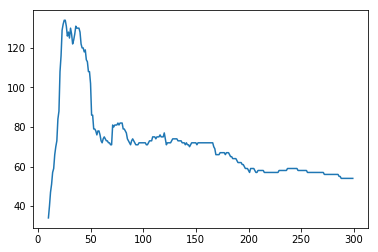

In [43]:
plt.plot(df_logs['bidprice'], df_logs['clicknum'])

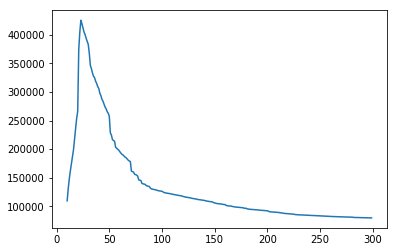

In [45]:
plt.plot(df_logs['bidprice'], df_logs['imp'])

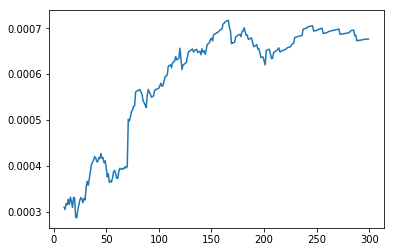

In [40]:
plt.plot(df_logs['bidprice'], df_logs['ctr'])

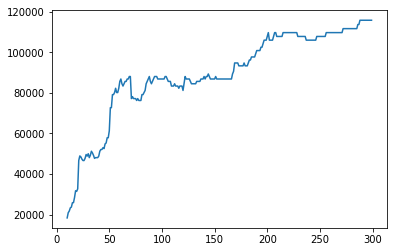

In [41]:
plt.plot(df_logs['bidprice'], df_logs['cpc'])

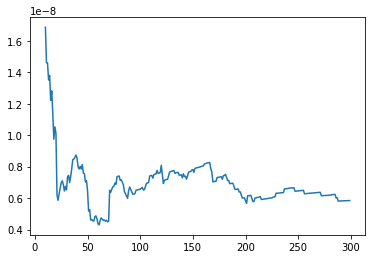

In [42]:
plt.plot(df_logs['bidprice'], df_logs['ctr']/df_logs['cpc'])

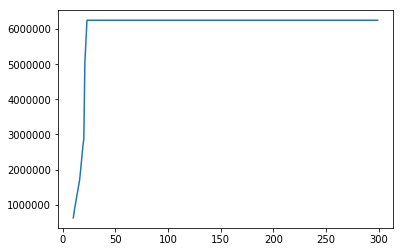

In [44]:
plt.plot(df_logs['bidprice'], df_logs['totalcost'])

In [46]:
df_logs['ctr/cpc'] = df_logs['ctr']/df_logs['cpc']

In [47]:
df_logs.sort_values(by='ctr/cpc')[:10]

,imp,totalcost,clicknum,ctr,cpc,bidprice,ctr/cpc
51,193013.0,6249976.0,72.0,0.000373,86805.222222,61,4.297344e-09
50,195613.0,6249995.0,73.0,0.000373,85616.369863,60,4.358814e-09
59,179322.0,6249992.0,71.0,0.000396,88028.056338,69,4.497836e-09
60,178252.0,6249971.0,71.0,0.000398,88027.760563,70,4.524851e-09
57,182847.0,6249954.0,72.0,0.000394,86804.916667,67,4.536285e-09
46,203324.0,6249975.0,76.0,0.000374,82236.513158,56,4.545276e-09
45,213859.0,6249971.0,78.0,0.000365,80127.833333,55,4.551805e-09
55,186026.0,6249979.0,73.0,0.000392,85616.150685,65,4.583461e-09
52,191016.0,6249980.0,74.0,0.000387,84459.189189,62,4.586856e-09
58,180660.0,6249996.0,72.0,0.000399,86805.500000,68,4.591169e-09


In [49]:
df_logs.sort_values(by='ctr', ascending=False)[:10]

,imp,totalcost,clicknum,ctr,cpc,bidprice,ctr/cpc
156,100368.0,6249986.0,72.0,0.000717,86805.361111,166,8.264007e-09
155,100557.0,6249981.0,72.0,0.000716,86805.291667,165,8.248481e-09
154,100649.0,6249986.0,72.0,0.000715,86805.361111,164,8.240935e-09
153,100845.0,6249957.0,72.0,0.000714,86804.958333,163,8.224956e-09
152,101303.0,6249967.0,72.0,0.000711,86805.097222,162,8.187757e-09
151,101472.0,6249983.0,72.0,0.000710,86805.319444,161,8.174100e-09
236,83661.0,6249960.0,59.0,0.000705,105931.525424,246,6.657386e-09
235,83712.0,6249962.0,59.0,0.000705,105931.559322,245,6.653328e-09
234,83781.0,6249985.0,59.0,0.000704,105931.949153,244,6.647824e-09
233,83830.0,6249915.0,59.0,0.000704,105930.762712,243,6.644013e-09


# Evaluation

In [52]:
list(range(25, 201, 25))

[25, 50, 75, 100, 125, 150, 175, 200]

In [53]:
validation = pd.read_csv('/Users/liuce/Downloads/we_data/validation.csv')

In [57]:
myBid = 70
data_val = pd.DataFrame([myBid] * len(validation))

In [60]:
data_val.columns = ['myBid']
data_val[:5]

,myBid
0,70
1,70
2,70
3,70
4,70


In [64]:
data_val['click'] = validation['click']
data_val['PayPrice'] = validation['payprice']
data_val[:5]

,myBid,click,PayPrice
0,70,0,23
1,70,0,75
2,70,0,65
3,70,0,6
4,70,0,5


In [65]:
CTR = 0
CPC = 0
Clicks = 0
Win = 0
Loss = 0
Budget = 6250000
MyBids = 0
for payprice,click,myBid in data_val[['PayPrice','click','myBid']].values:
    payprice = payprice
    myBid = myBid
    if myBid>=payprice and Budget >=payprice:
        Win = Win + 1
        Budget = Budget - payprice
        Clicks = Clicks + click
        MyBids = MyBids + myBid
    else:
        Loss = Loss + 1
CTR = (Clicks/Win)*100
CTR0 = (data_val['click'].values.sum()/len(data_val))*100
Budget0 = data_val['PayPrice'].values.sum()

In [73]:
print("Impressions:",Win)
print("Clicks     :",Clicks)
print("CTR        :",CTR)
print("Orginal CTR:",CTR0)
print("CPM        :",((6250000-Budget)/(Win*1000)))
print("eCPC       :",((6250000-Budget)/Clicks))
print("Spent      :",(6250000 - Budget))

Impressions: 162214
Clicks     : 65
CTR        : 0.0400705241225
Orginal CTR: 0.0664637657317
CPM        : 0.0385293501177
eCPC       : 96153.8461538
Spent      : 6250000
